In [11]:
import pandas as pd

data = pd.read_csv("kmeans.csv")
print(data)

    height  weight  id
0      185      72   1
1      170      56   2
2      168      60   3
3      179      68   4
4      182      72   5
5      188      77   6
6      180      71   7
7      180      70   8
8      183      84   9
9      180      88  10
10     180      67  11
11     177      76  12


In [12]:
# Centroids

c1 = list(data.iloc[0])[1:]
c2 = list(data.iloc[1])[1:]

c1,c2

([72, 1], [56, 2])

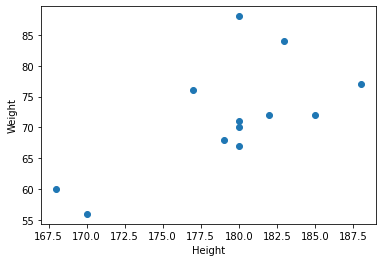

In [13]:
x = []
y = []

for i, j in zip(data['height'], data['weight']):
    x.append(i)
    y.append(j)

import matplotlib.pyplot as plt
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x,y)

In [21]:
from scipy.spatial import distance

set1 = []
set2 = []
center = 0

for i, j in zip(data['height'], data['weight']):
    center += 1
    c1_distance = distance.euclidean((i, j), c1)
    c2_distance = distance.euclidean((i, j), c2)
    
    if(c1_distance <= c2_distance):
        c1[0] = (c1[0] + i)/2
        c1[1] = (c1[1] + j)/2
        set1.append(center)
    else:
        c2[0] = (c2[0] + i)/2
        c2[1] = (c2[1] + j)/2
        set2.append(center)

print(set1, set2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] []


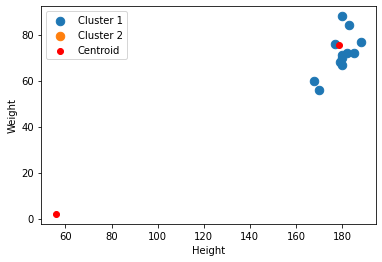

In [22]:
plt.xlabel("Height")
plt.ylabel("Weight")

x = []
y = []

for indx in set1:
    point = data[data['id'] == indx]
    x += list(point['height'])
    y += list(point['weight'])
    
plt.scatter(x, y, label = 'Cluster 1', s=72)

x = []
y = []

for indx in set2:
    point = data[data['id'] == indx]
    x += list(point['height'])
    y += list(point['weight'])

plt.scatter(x, y, label = 'Cluster 2', s=72)

plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label='Centroid', c='red', )
plt.legend()